## Import packages

In [9]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import data

In [10]:
# Read in data
raw = pd.read_csv('car_data.csv')

In [11]:
df = raw.copy()

## Analyzing features

In [12]:
# Check data
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
# Check data types
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [14]:
# Null values 
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [15]:
# Fix data types
# Year as year type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# Owner as categorical variable
df['Owner'] = df['Owner'].astype('object')

In [36]:
# Describe data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


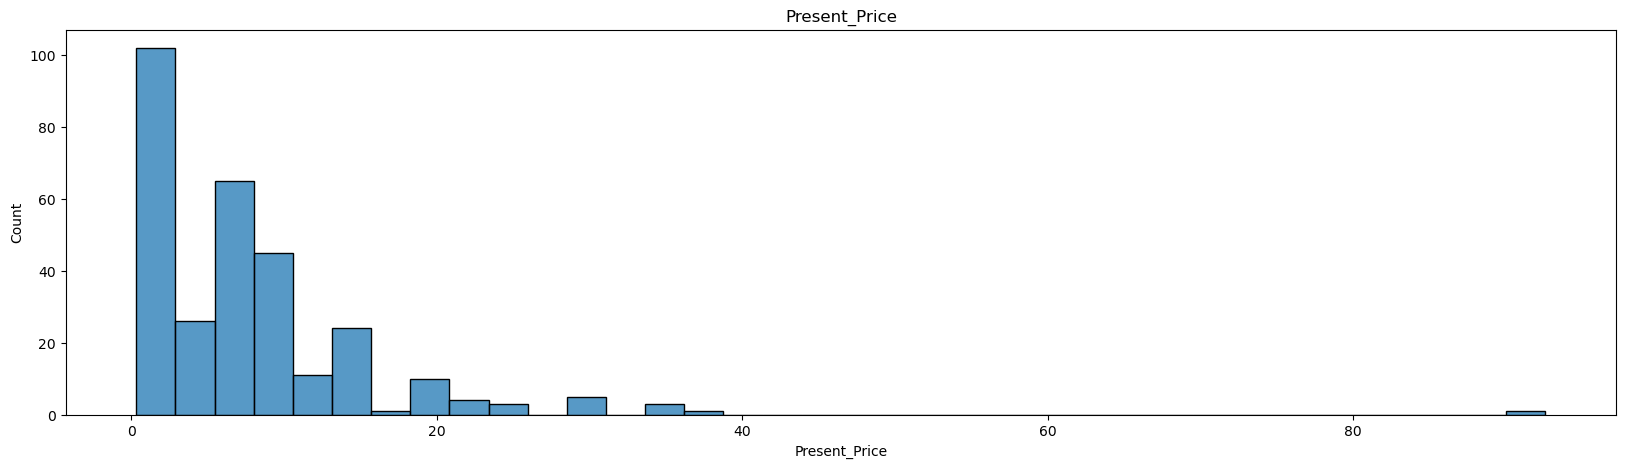

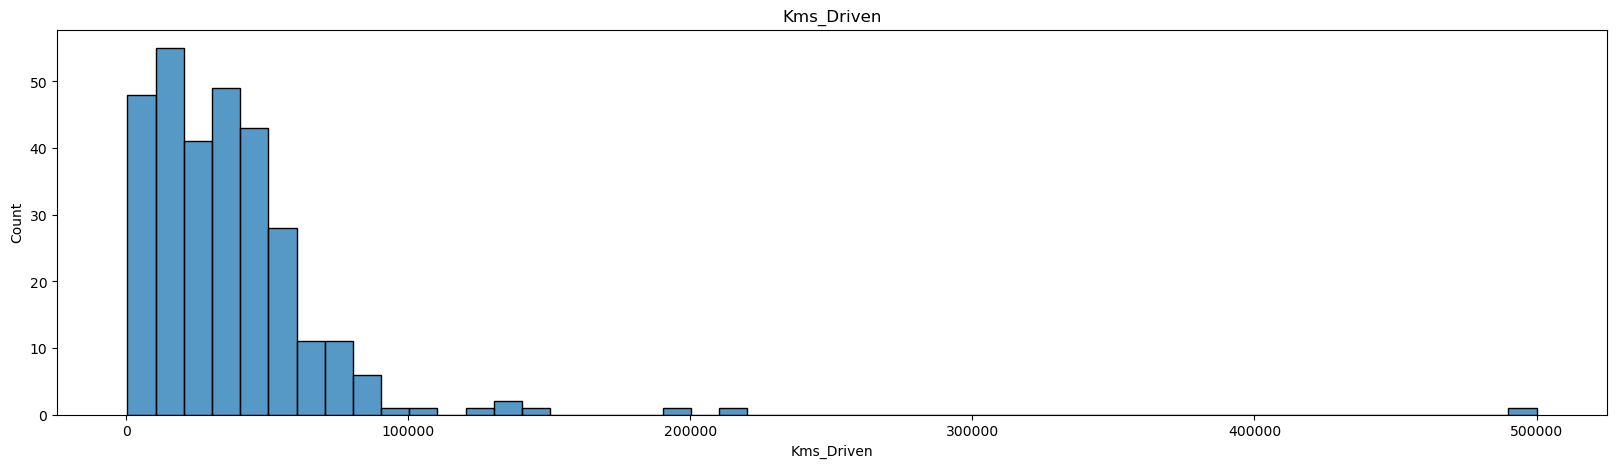

In [18]:
# Histogram of selling price
numerical_list = [ 'Present_Price', 'Kms_Driven']
for i in numerical_list:
    plt.figure(figsize=(20,5))
    plt.title(i)
    sns.histplot(df[i])
    plt.show()


In [38]:
# Get outliers
def get_outliers(df, col):
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Count outliers for each feature
for i in numerical_list:
    print(i)
    print(get_outliers(df, i).shape[0])


Present_Price
5
Kms_Driven
3


/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


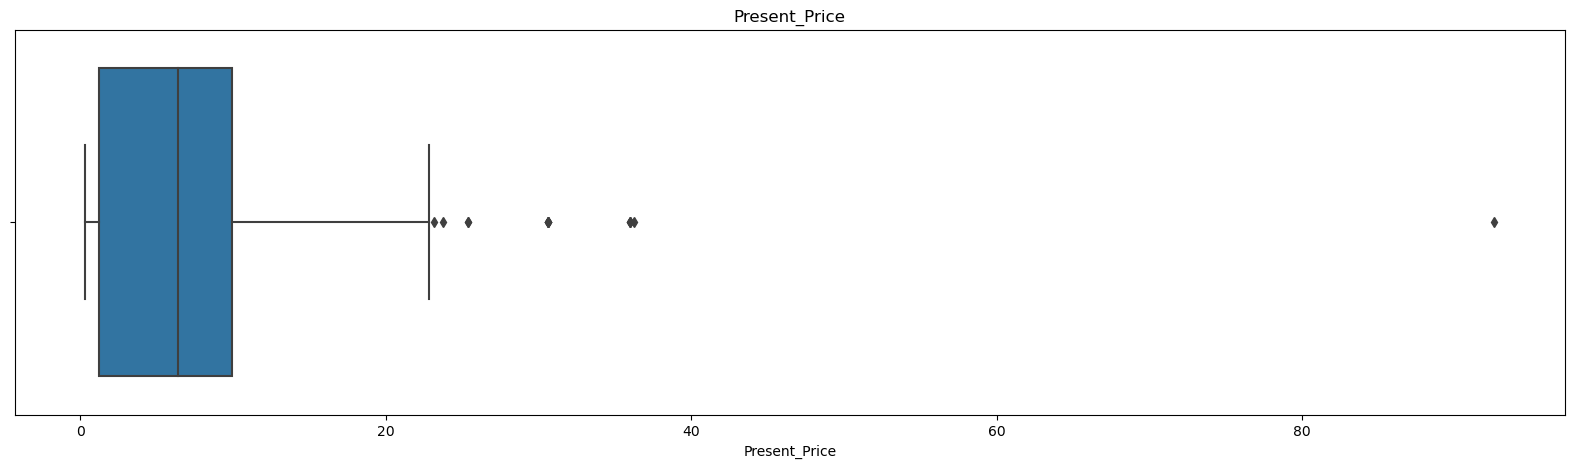

/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


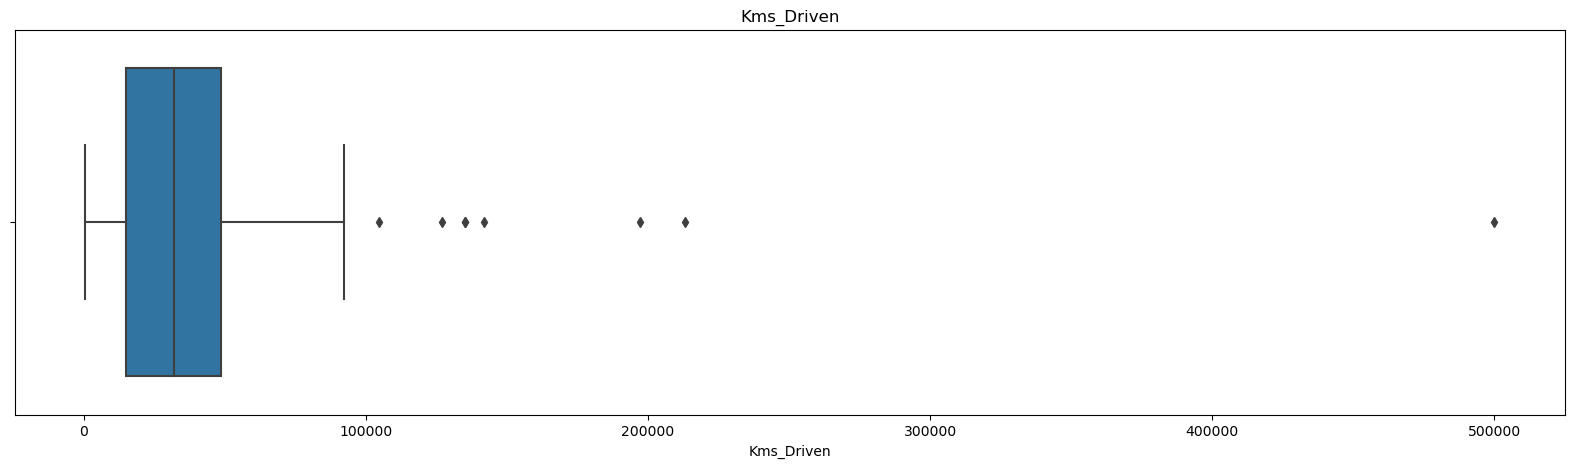

In [20]:
# Boxplot of numerical variables
numerical_list = [ 'Present_Price', 'Kms_Driven']
for i in numerical_list:
    plt.figure(figsize=(20,5))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

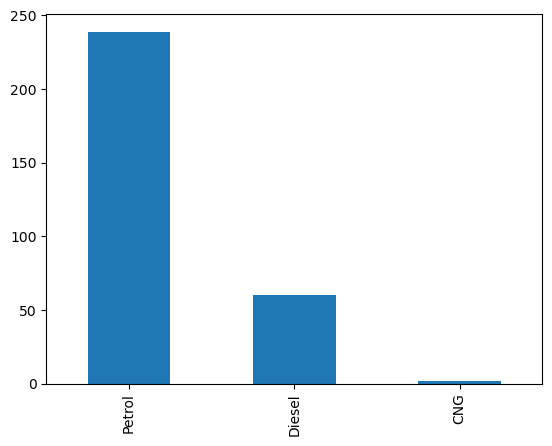

In [21]:
# Plot non numerical variables
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.show()

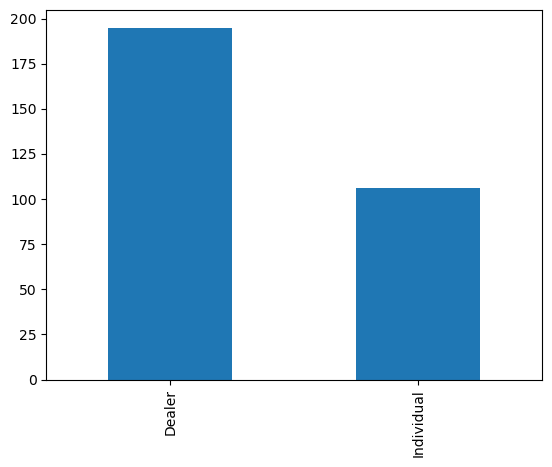

In [22]:
# Plot non numerical variables
df['Seller_Type'].value_counts().plot(kind='bar')
plt.show()

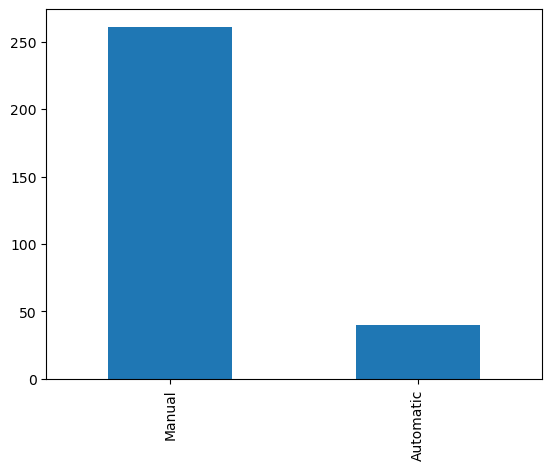

In [23]:
# Plot non numerical variables
df['Transmission'].value_counts().plot(kind='bar')  
plt.show()

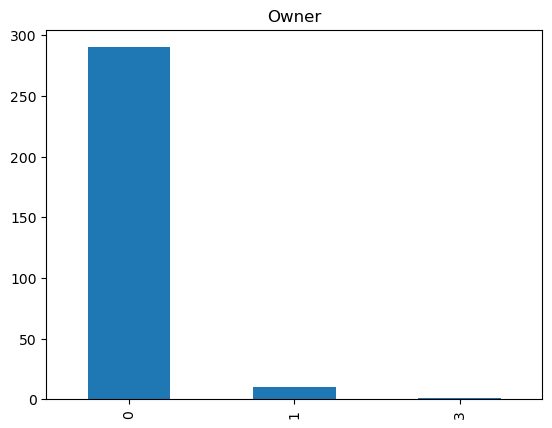

In [39]:
# Plot non numerical variables
df['Owner'].value_counts().plot(kind='bar')
# Title
plt.title('Owner')
plt.show()

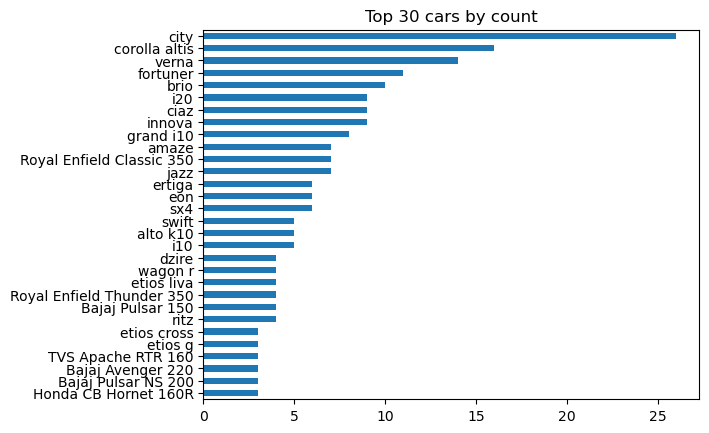

In [25]:
# Plot non numerical variables
df['Car_Name'].value_counts(ascending = True).tail(30).plot(kind='barh')
# Ttile as 'Top 30 cars by count'
plt.title('Top 30 cars by count')
plt.show()

<AxesSubplot:>

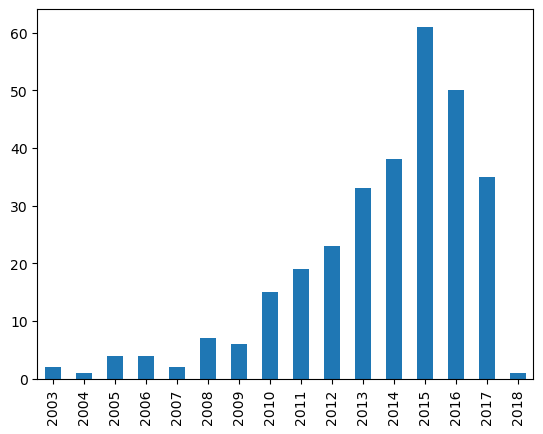

In [26]:
# Plot year in chronological order
df['Year'] = df['Year'].dt.year
df['Year'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

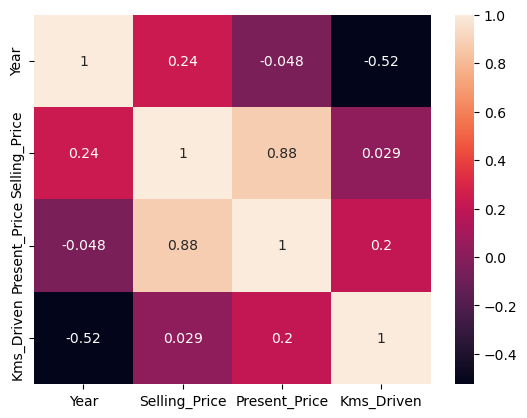

In [27]:
# Plot correlation matrix of variables
corr = df.corr()
sns.heatmap(corr, annot=True)

## Analyze target 

/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

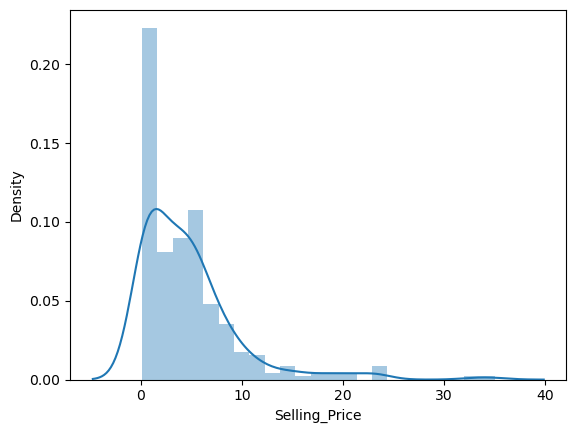

In [28]:
# Plot selling price
sns.distplot(df['Selling_Price'])


/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

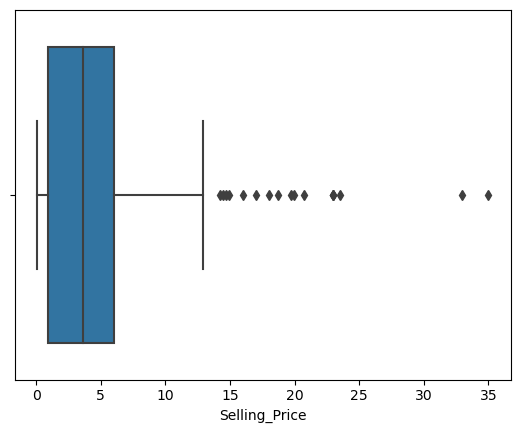

In [29]:
# Print boxplot of selling price
sns.boxplot(df['Selling_Price'])

/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

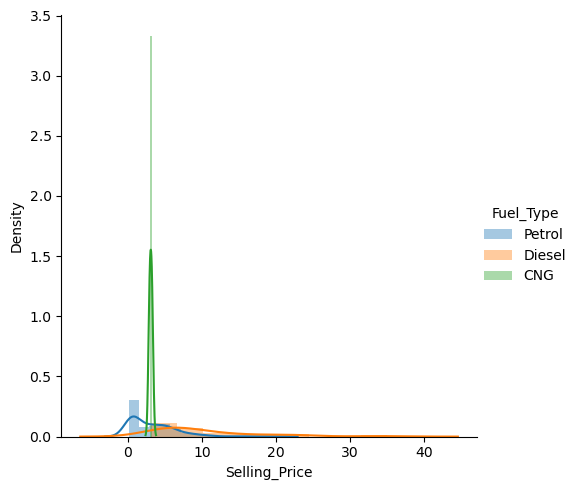

In [30]:
# Print selling price histogram and color by fuel type
sns.FacetGrid(df, hue="Fuel_Type", height=5).map(sns.distplot, "Selling_Price").add_legend()

/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


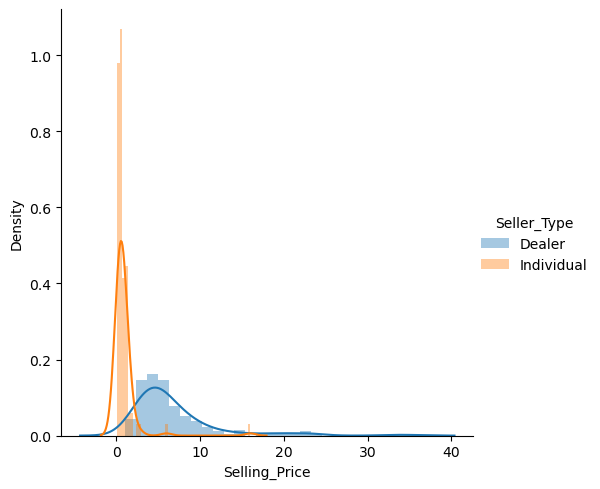

In [31]:
# Print selling price histogram and color by seller type
sns.FacetGrid(df, hue="Seller_Type", height=5).map(sns.distplot, "Selling_Price").add_legend()


/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


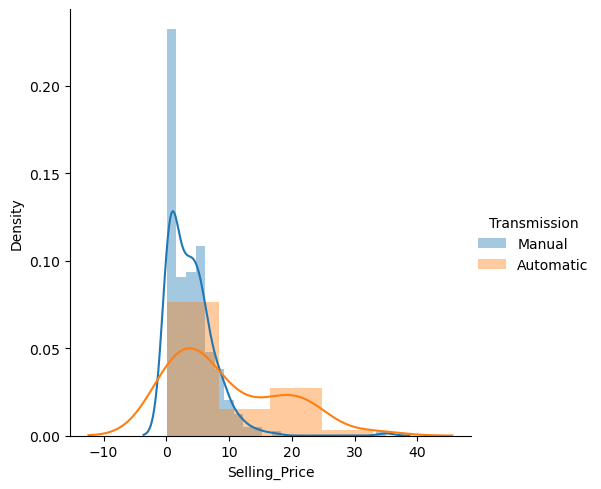

In [32]:
# Print selling price histogram and color by tranwmission type
sns.FacetGrid(df, hue="Transmission", height=5).map(sns.distplot, "Selling_Price").add_legend()

/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

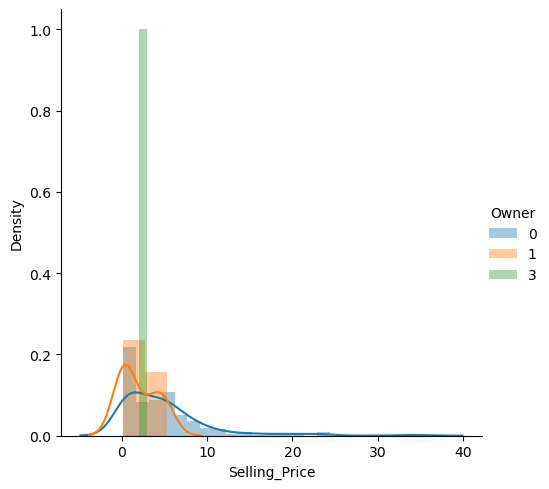

In [33]:
# Print selling price histogram and color by owner type
sns.FacetGrid(df, hue="Owner", height=5).map(sns.distplot, "Selling_Price").add_legend()

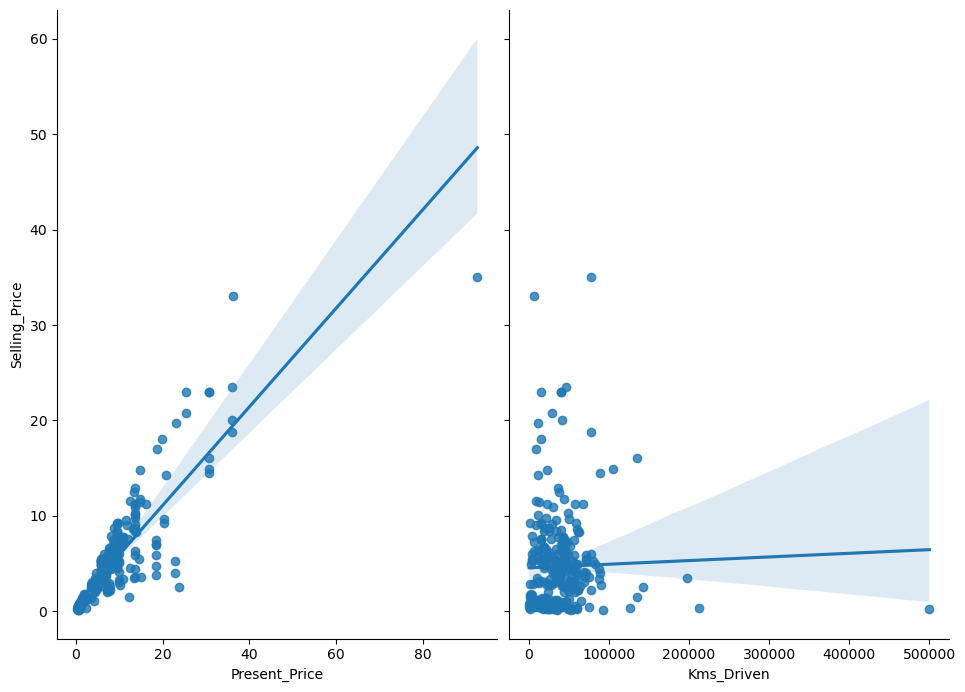

In [34]:
# Plot scatter plot of selling price and numerical variables
sns.pairplot(df, x_vars=['Present_Price', 'Kms_Driven'], y_vars='Selling_Price', height=7, aspect=0.7, kind='reg')

Text(0.5, 1.0, 'Top 30 cars by average selling price')

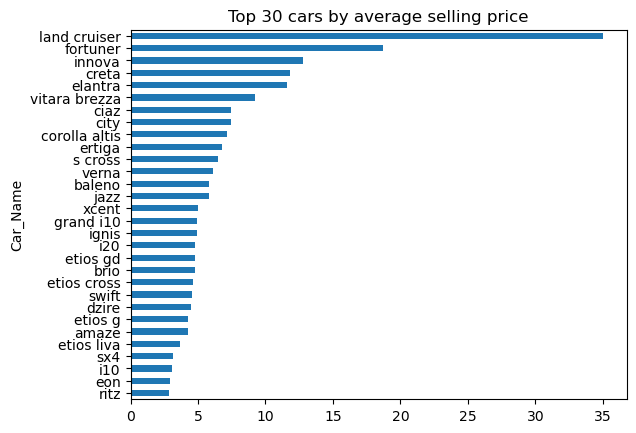

In [35]:
# Plot 10 top car name by selling price
df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=True).tail(30).plot(kind='barh')
# Ttile as 'Top 30 cars by average selling price
plt.title('Top 30 cars by average selling price')